In [92]:
import pandas as pd
import numpy as np

# Loading the data

In [93]:
pcc=pd.read_csv("C:/Shakeer/ML/Assignment 2/Assignment2_PGD B7/People Charm case.csv")
pcc.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [94]:
pcc.shape

(14999, 10)

In [95]:
pcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfactoryLevel        14999 non-null float64
lastEvaluation           14999 non-null float64
numberOfProjects         14999 non-null int64
avgMonthlyHours          14999 non-null int64
timeSpent.company        14999 non-null int64
workAccident             14999 non-null int64
left                     14999 non-null int64
promotionInLast5years    14999 non-null int64
dept                     14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


- No Null values exists in the data

In [96]:
pcc['dept'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'IT',
       'product_mng', 'marketing', 'management', 'RandD'], dtype=object)

# Converting categorical to numerical columns
- Using LabelEncoder
- using get_dummies

In [97]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
pcc['salary']=pd.DataFrame(lb.fit_transform(pcc['salary']))

In [98]:
pcc

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.37,0.52,2,159,3,0,1,0,sales,1
4,0.41,0.50,2,153,3,0,1,0,sales,1
5,0.10,0.77,6,247,4,0,1,0,sales,1
6,0.92,0.85,5,259,5,0,1,0,sales,1
7,0.42,0.53,2,142,3,0,1,0,sales,1
8,0.45,0.54,2,135,3,0,1,0,sales,1
9,0.11,0.81,6,305,4,0,1,0,sales,1


In [99]:
pcc=pd.get_dummies(pcc,prefix=['dept'])

In [100]:
pcc.shape

(14999, 19)

### duplicated() function is used to check whether there are any repeated rows exists in the data or not. 
### It returns a boolean value TRUE if duplicate rows exists

In [101]:
pcc.duplicated()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
14969     True
14970     True
14971     True
14972    False
14973    False
14974     True
14975    False
14976    False
14977    False
14978    False
14979     True
14980    False
14981    False
14982    False
14983    False
14984     True
14985     True
14986    False
14987     True
14988     True
14989    False
14990    False
14991    False
14992    False
14993     True
14994     True
14995    False
14996    False
14997    False
14998    False
Length: 14999, dtype: bool

### drop_duplicates() function is used to drop the duplicate rows

In [102]:
pcc.drop_duplicates(keep='first',inplace=True)

### Dropping dependent Feature 

In [103]:
pcc_new=pcc.drop(['left'],axis=1)

In [104]:
pcc_new.shape

(11991, 18)

### Checking the skewness

In [105]:
pcc_new.skew()

satisfactoryLevel       -0.538702
lastEvaluation          -0.031686
numberOfProjects         0.332152
avgMonthlyHours          0.027208
timeSpent.company        1.816577
workAccident             1.914410
promotionInLast5years    7.490008
salary                  -0.446049
dept_IT                  3.062158
dept_RandD               3.787231
dept_accounting          4.045725
dept_hr                  4.124169
dept_management          4.954409
dept_marketing           3.857515
dept_product_mng         3.813648
dept_sales               1.035579
dept_support             1.940320
dept_technical           1.604510
dtype: float64

Text(0.5, 0, 'Satisfaction level')

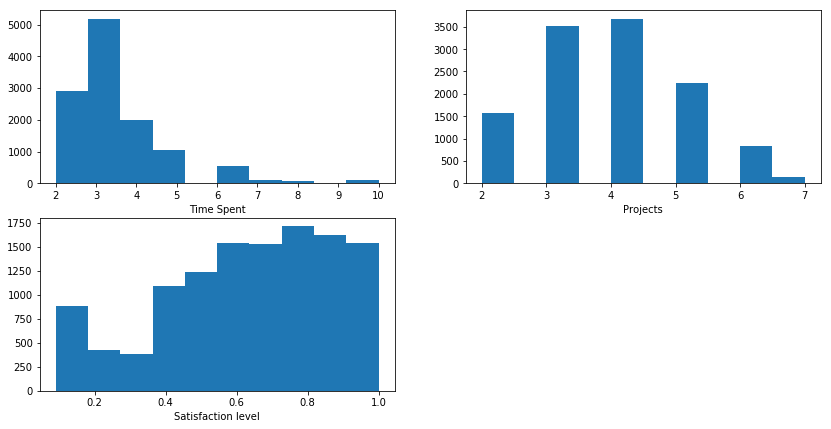

In [106]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[14,7]
fig=plt.figure()
#plt.subplot(rows,columns,for which u r drawing this)
plt.subplot(2,2,1)
plt.hist(pcc_new['timeSpent.company'])
plt.xlabel('Time Spent')

plt.subplot(2,2,2)
plt.hist(pcc_new['numberOfProjects'])
plt.xlabel('Projects')

plt.subplot(2,2,3)
plt.hist(pcc_new['satisfactoryLevel'])
plt.xlabel('Satisfaction level')

# Applying Transformation techniques to reduce skewness

In [107]:
pcc_new['timeSpent.company']=1/(pcc_new['timeSpent.company'])

In [108]:
pcc_new['timeSpent.company'].skew()

0.23554454657350543

In [109]:
pcc_new['numberOfProjects']=np.sqrt(pcc_new['numberOfProjects'])

In [110]:
pcc_new['numberOfProjects'].skew()

0.0009280462497749815

In [111]:
pcc_new['satisfactoryLevel']=np.exp(pcc_new['satisfactoryLevel'])

In [112]:
pcc_new['satisfactoryLevel'].skew()

-0.12676326444581332

Text(0.5, 0, 'Satisfaction level')

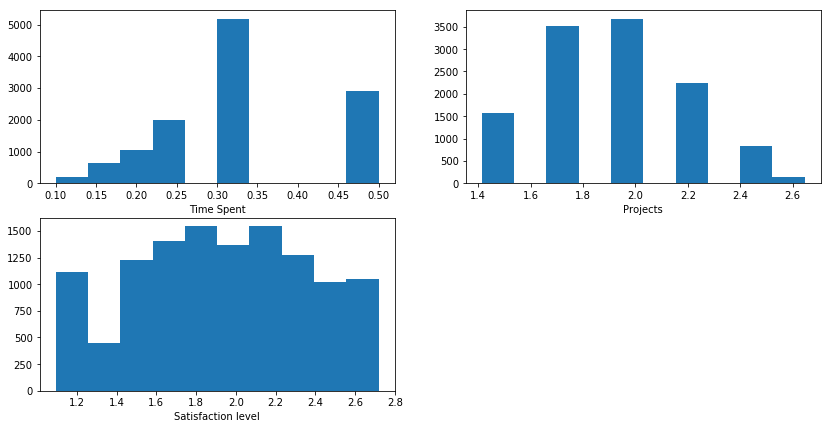

In [113]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[14,7]
fig=plt.figure()
#plt.subplot(rows,columns,for which u r drawing this)
plt.subplot(2,2,1)
plt.hist(pcc_new['timeSpent.company'])
plt.xlabel('Time Spent')

plt.subplot(2,2,2)
plt.hist(pcc_new['numberOfProjects'])
plt.xlabel('Projects')

plt.subplot(2,2,3)
plt.hist(pcc_new['satisfactoryLevel'])
plt.xlabel('Satisfaction level')

- From the above charts we can get to know that the data is normally distributed after applying transformations

In [114]:
pcc_new.skew()

satisfactoryLevel       -0.126763
lastEvaluation          -0.031686
numberOfProjects         0.000928
avgMonthlyHours          0.027208
timeSpent.company        0.235545
workAccident             1.914410
promotionInLast5years    7.490008
salary                  -0.446049
dept_IT                  3.062158
dept_RandD               3.787231
dept_accounting          4.045725
dept_hr                  4.124169
dept_management          4.954409
dept_marketing           3.857515
dept_product_mng         3.813648
dept_sales               1.035579
dept_support             1.940320
dept_technical           1.604510
dtype: float64

# KNN Algorithm

In [115]:
x=pcc_new # Independent Features
y=pcc['left'] #Dependent Features
x

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,promotionInLast5years,salary,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,1.462285,0.53,1.414214,157,0.333333,0,0,1,0,0,0,0,0,0,0,1,0,0
1,2.225541,0.86,2.236068,262,0.166667,0,0,2,0,0,0,0,0,0,0,1,0,0
2,1.116278,0.88,2.645751,272,0.250000,0,0,2,0,0,0,0,0,0,0,1,0,0
3,1.447735,0.52,1.414214,159,0.333333,0,0,1,0,0,0,0,0,0,0,1,0,0
4,1.506818,0.50,1.414214,153,0.333333,0,0,1,0,0,0,0,0,0,0,1,0,0
5,1.105171,0.77,2.449490,247,0.250000,0,0,1,0,0,0,0,0,0,0,1,0,0
6,2.509290,0.85,2.236068,259,0.200000,0,0,1,0,0,0,0,0,0,0,1,0,0
7,1.521962,0.53,1.414214,142,0.333333,0,0,1,0,0,0,0,0,0,0,1,0,0
8,1.568312,0.54,1.414214,135,0.333333,0,0,1,0,0,0,0,0,0,0,1,0,0
9,1.116278,0.81,2.449490,305,0.250000,0,0,1,0,0,0,0,0,0,0,1,0,0


In [116]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score

In [117]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=3)

In [118]:
len(x_test)

2399

In [119]:
knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train,y_train)
print("KNN Score=",knn.score(x_test,y_test)*100)
prediction=knn.predict(x_test)

KNN Score= 88.91204668611921


In [120]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,prediction)
print("Confusion Matrix  for KNN is:", cm,sep='\n')

Confusion Matrix  for KNN is:
[[1939   63]
 [ 203  194]]


In [121]:
k_list=[i for i in range(1,31)]

In [122]:
mis_class=[]
for k in k_list:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    prediction=knn.predict(x_test)
    mis_class.append(sum(prediction!=y_test))

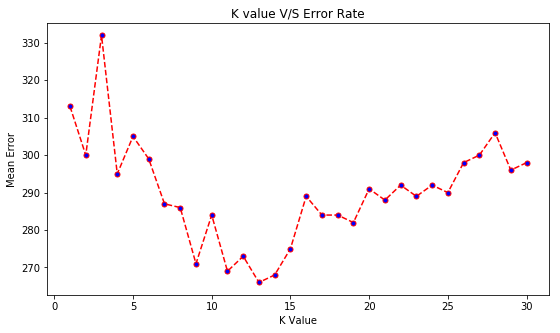

In [123]:
plt.rcParams['figure.figsize']=[9,5]
fig=plt.figure()
plt.plot(k_list,mis_class,color='red',linestyle='dashed',marker='o',
        markerfacecolor='blue',markersize=5)
plt.title('K value V/S Error Rate')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

- The Plot shows the appropriate value of the K where there will be minimum error Here the appropriate k value is '13'

In [124]:
probs=knn.predict_proba(x_test) # It will give the probabilities of classes for predicted value
probs

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.8       , 0.2       ],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.86666667, 0.13333333]])

In [125]:
#ROC calculation for KNN
from sklearn import metrics
prob_positive=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print('Area Under the curve: ',(roc_auc)*100)

Area Under the curve:  87.35219440509114


In [126]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2002
           1       0.79      0.34      0.48       397

    accuracy                           0.88      2399
   macro avg       0.83      0.66      0.70      2399
weighted avg       0.87      0.88      0.85      2399



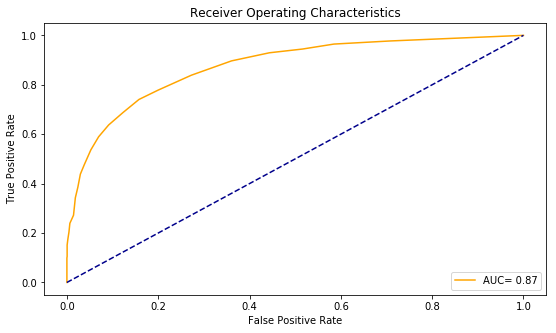

In [127]:
plt.rcParams['figure.figsize']=[9,5]
fig=plt.figure()

plt.title('Receiver Operating Characteristics')
plt.plot(fpr,tpr,'orange',label='AUC= %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

- The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR). The closer the curve comes to the 45-degree diagonal of the ROC space or AUC(Area Under the Curve), the less accurate the test.

# Logistic Regression

In [128]:
from sklearn.linear_model import LogisticRegression
lreg=LogisticRegression()
lreg=lreg.fit(x_train,y_train)


C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [129]:
print(lreg.coef_)

[[-2.14515111e+00  9.11746360e-01 -1.46992501e+00  5.16453160e-03
  -6.43368185e+00 -1.42310540e+00 -1.63147386e+00  2.63765411e-02
   4.68312659e-01  1.69507703e-01  5.14266209e-01  6.64545542e-01
   3.67166828e-02  6.05370873e-01  4.11340129e-01  6.09947402e-01
   7.23053888e-01  6.91571207e-01]]


In [130]:
print(lreg.intercept_)

[4.8946323]


In [131]:
y_predict=lreg.predict(x_test)
len(y_predict)

2399

In [132]:
#Confusion Matrix for Logistic Regression
cm=confusion_matrix(y_test,y_predict)
print("Confusion Matrix for logistic Regression :", cm,sep='\n')

Confusion Matrix for logistic Regression :
[[1913   89]
 [ 327   70]]


In [133]:
probs=lreg.predict_proba(x_test) # will give the probabitlities of classes for predicted value
probs

array([[0.94650096, 0.05349904],
       [0.88672373, 0.11327627],
       [0.98125339, 0.01874661],
       ...,
       [0.45296588, 0.54703412],
       [0.62250228, 0.37749772],
       [0.59484712, 0.40515288]])

In [134]:
#ROC calculation

prob_positive=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print('Area Under the curve: ',(roc_auc)*100)
print("Accuracy Score : ",lreg.score(x_test,y_test)*100)

Area Under the curve:  82.84876332735276
Accuracy Score :  82.65944143393081


In [135]:
prob_positive

array([0.05349904, 0.11327627, 0.01874661, ..., 0.54703412, 0.37749772,
       0.40515288])

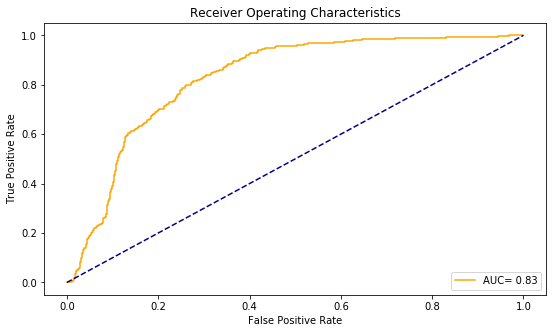

In [136]:
#Plot ROC Curve for Logistics
plt.rcParams['figure.figsize']=[9,5]
fig=plt.figure()

plt.title('Receiver Operating Characteristics')
plt.plot(fpr,tpr,'orange',label='AUC= %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [137]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2002
           1       0.44      0.18      0.25       397

    accuracy                           0.83      2399
   macro avg       0.65      0.57      0.58      2399
weighted avg       0.79      0.83      0.79      2399



# Naive Bayes Algorithm

In [138]:
from sklearn.naive_bayes import GaussianNB

In [139]:
nb=GaussianNB()
nb.fit(x_train,y_train)
prediction=nb.predict(x_test)
print("nb Score=",accuracy_score(y_test,prediction)*100)

nb Score= 76.82367653188828


In [140]:
# Confusion Matrix for Naive Bayes Algorithm
cm=confusion_matrix(y_test,prediction)
print("Confusion Matrix  Naive Bayes:", cm,sep='\n')

Confusion Matrix  Naive Bayes:
[[1552  450]
 [ 106  291]]


In [141]:
probs=nb.predict_proba(x_test)#will give the probabitlities of classes for predicted value
probs

array([[9.96055130e-01, 3.94487007e-03],
       [6.01724382e-01, 3.98275618e-01],
       [9.99991048e-01, 8.95248458e-06],
       ...,
       [1.91636731e-02, 9.80836327e-01],
       [1.50714574e-01, 8.49285426e-01],
       [7.21712462e-01, 2.78287538e-01]])

In [142]:
prob_positive=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print('Area Under the curve: ',(roc_auc)*100)

Area Under the curve:  82.10353877860175


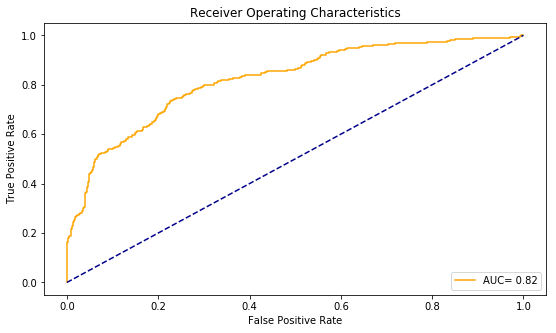

In [143]:
#Plot ROC Curve for Naive Bayes
plt.rcParams['figure.figsize']=[9,5]
fig=plt.figure()

plt.title('Receiver Operating Characteristics')
plt.plot(fpr,tpr,'orange',label='AUC= %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [144]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85      2002
           1       0.39      0.73      0.51       397

    accuracy                           0.77      2399
   macro avg       0.66      0.75      0.68      2399
weighted avg       0.85      0.77      0.79      2399



# Decision Tree

In [145]:
from sklearn.tree import DecisionTreeClassifier

In [146]:
clf=DecisionTreeClassifier(criterion='gini',splitter='random',max_leaf_nodes=10,min_samples_leaf=5,max_depth=4)
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

In [147]:
y_pred=clf.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [148]:
cols=list(x.columns.values)
print(cols)

['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects', 'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'promotionInLast5years', 'salary', 'dept_IT', 'dept_RandD', 'dept_accounting', 'dept_hr', 'dept_management', 'dept_marketing', 'dept_product_mng', 'dept_sales', 'dept_support', 'dept_technical']


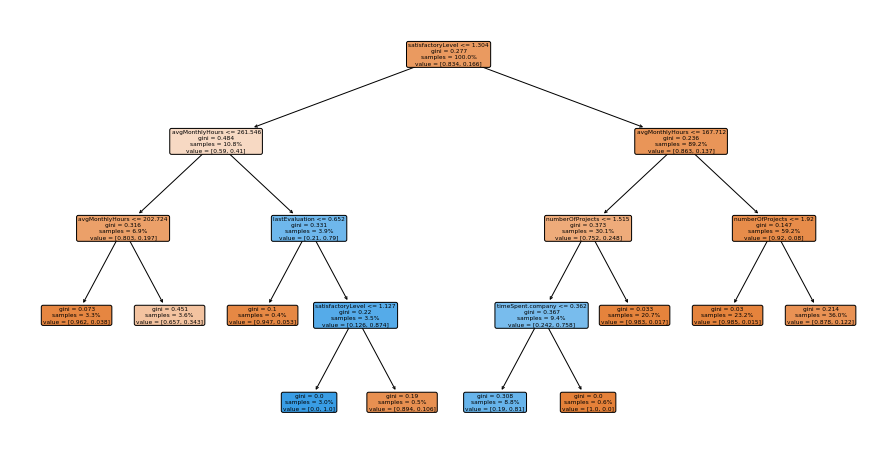

In [149]:
from sklearn import tree
plt.figure(figsize=(15,8))

tree.plot_tree(clf.fit(x_train,y_train),feature_names=cols,filled=True,
              precision=3,proportion=True,rounded=True)
plt.show()

In [150]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix for Decision Tree is:", cm,sep='\n')

Confusion Matrix for Decision Tree is:
[[1913   89]
 [ 128  269]]


In [151]:
print("DecisionTree Score=",accuracy_score(y_test,y_pred)*100)

DecisionTree Score= 90.95456440183409


In [152]:
probs=clf.predict_proba(x_test)#will give the probabitlities of classes for predicted value
probs

array([[0.98335855, 0.01664145],
       [0.87822557, 0.12177443],
       [0.87822557, 0.12177443],
       ...,
       [0.96214511, 0.03785489],
       [0.96214511, 0.03785489],
       [0.65697674, 0.34302326]])

In [153]:
prob_positive=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print('Area Under the curve: ',(roc_auc)*100)

Area Under the curve:  88.1381213245193


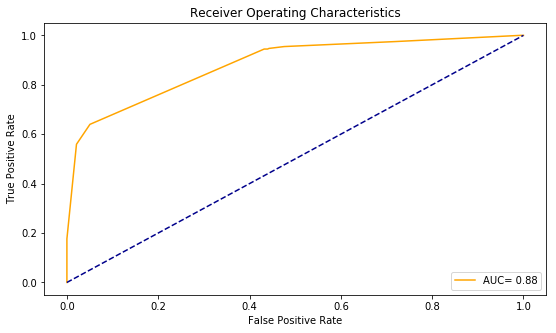

In [154]:
#Plot ROC Curve for Decision Tree
plt.rcParams['figure.figsize']=[9,5]
fig=plt.figure()

plt.title('Receiver Operating Characteristics')
plt.plot(fpr,tpr,'orange',label='AUC= %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [155]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2002
           1       0.75      0.68      0.71       397

    accuracy                           0.91      2399
   macro avg       0.84      0.82      0.83      2399
weighted avg       0.91      0.91      0.91      2399



# Random Forest Algorithm

In [156]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [157]:
rf=RandomForestClassifier(n_estimators=100,random_state=0) #n_estimators indicates the number of trees in the forest
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.9820758649437266

In [158]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix Random Forest Algorithm is:", cm,sep='\n')

Confusion Matrix Random Forest Algorithm is:
[[1998    4]
 [  39  358]]


In [159]:
probs=rf.predict_proba(x_test)#will give the probabitlities of classes for predicted value
probs

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [0.95, 0.05],
       [1.  , 0.  ],
       [0.92, 0.08]])

In [160]:
prob_positive=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print('Area Under the curve: ',(roc_auc)*100)

Area Under the curve:  98.26841923819254


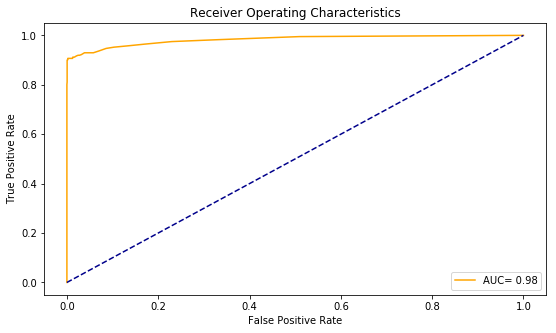

In [161]:
#Plot ROC Curve for Random Forest
plt.rcParams['figure.figsize']=[9,5]
fig=plt.figure()

plt.title('Receiver Operating Characteristics')
plt.plot(fpr,tpr,'orange',label='AUC= %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [162]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2002
           1       0.99      0.90      0.94       397

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.97      2399
weighted avg       0.98      0.98      0.98      2399



# AdaBoost Algorithm

In [163]:
ab=AdaBoostClassifier(n_estimators=100)
ab.fit(x_train,y_train)
y_pred=ab.predict(x_test)
accuracy_score(y_test,y_pred)

0.9624843684868696

In [164]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix AdaBoost Algorithm is:", cm,sep='\n')

Confusion Matrix AdaBoost Algorithm is:
[[1972   30]
 [  60  337]]


In [165]:
probs=ab.predict_proba(x_test)#will give the probabitlities of classes for predicted value
probs

array([[0.51757083, 0.48242917],
       [0.5108885 , 0.4891115 ],
       [0.51463932, 0.48536068],
       ...,
       [0.67837717, 0.32162283],
       [0.51722963, 0.48277037],
       [0.50371096, 0.49628904]])

In [166]:
prob_positive=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print('Area Under the curve: ',(roc_auc)*100)

Area Under the curve:  97.58251823743007


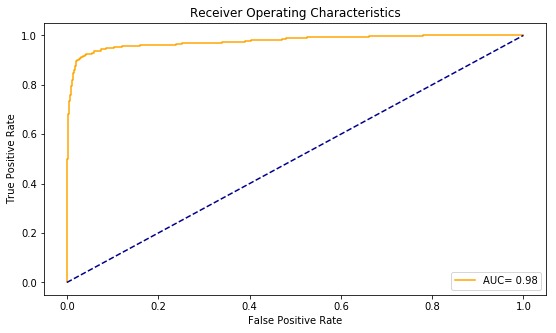

In [167]:
#Plot ROC Curve for AdaBosst
plt.rcParams['figure.figsize']=[9,5]
fig=plt.figure()

plt.title('Receiver Operating Characteristics')
plt.plot(fpr,tpr,'orange',label='AUC= %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [168]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2002
           1       0.92      0.85      0.88       397

    accuracy                           0.96      2399
   macro avg       0.94      0.92      0.93      2399
weighted avg       0.96      0.96      0.96      2399



# Gradient Boosting

In [169]:
gb=GradientBoostingClassifier(n_estimators=100)
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
accuracy_score(y_test,y_pred)

0.9812421842434348

In [170]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix Gradient Algorithm is:", cm,sep='\n')

Confusion Matrix Gradient Algorithm is:
[[1991   11]
 [  34  363]]


In [171]:
probs=gb.predict_proba(x_test)#will give the probabitlities of classes for predicted value
probs

array([[0.99305845, 0.00694155],
       [0.98786408, 0.01213592],
       [0.99252811, 0.00747189],
       ...,
       [0.99387462, 0.00612538],
       [0.95311972, 0.04688028],
       [0.95677943, 0.04322057]])

In [172]:
prob_positive=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print('Area Under the curve: ',(roc_auc)*100)

Area Under the curve:  98.67229747582394


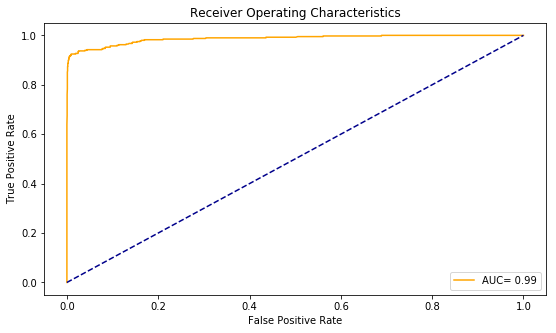

In [173]:
#Plot ROC Curve for Gradient Boost
plt.rcParams['figure.figsize']=[9,5]
fig=plt.figure()

plt.title('Receiver Operating Characteristics')
plt.plot(fpr,tpr,'orange',label='AUC= %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [174]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2002
           1       0.97      0.91      0.94       397

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.97      2399
weighted avg       0.98      0.98      0.98      2399



# XGBoost

In [175]:
from xgboost import XGBClassifier

In [176]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
accuracy_score(y_test,y_pred)

0.9795748228428511

In [177]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix XGBoost Algorithm is:", cm,sep='\n')

Confusion Matrix XGBoost Algorithm is:
[[1991   11]
 [  38  359]]


In [178]:
probs=xgb.predict_proba(x_test)# It will give the probabitlities of classes for predicted value
probs

array([[0.9909884 , 0.0090116 ],
       [0.98372114, 0.01627888],
       [0.992411  , 0.00758901],
       ...,
       [0.9865516 , 0.01344839],
       [0.96644115, 0.03355882],
       [0.93119067, 0.06880933]], dtype=float32)

In [179]:
prob_positive=probs[:,1]
fpr,tpr,threshold=metrics.roc_curve(y_test,prob_positive)
roc_auc=metrics.auc(fpr,tpr)
print('Area Under the curve: ',(roc_auc)*100)

Area Under the curve:  98.46356414366491


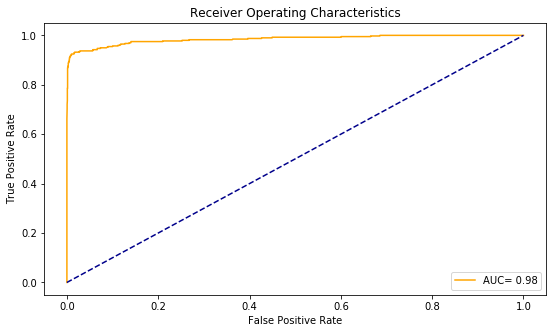

In [180]:
#Plot ROC Curve for XG Boost
plt.rcParams['figure.figsize']=[9,5]
fig=plt.figure()

plt.title('Receiver Operating Characteristics')
plt.plot(fpr,tpr,'orange',label='AUC= %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [181]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2002
           1       0.97      0.90      0.94       397

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399



# Which model gives best accuracy and why?

- When compared to all algorithms that we have performed on the People Charm Dataset, "Random Forest Model" has the best accuracy with "98.2%".
- The Random Forest algorithm basically creates multiple decision trees and merges them together to obtain a more stable and accurate prediction. In general, the more trees in the forest, the more robust would be the prediction and thus higher accuracy and If there are more trees, it won’t allow overfitting trees in the model.It has the power to handle a large data set with higher dimensionality.
- Because of the above advantages of Random Forest. I choose it as the best accuracy model for this dataset

# Do you feel accuracy is a good performance evaluation metric for the given data? If yes, justify your answer. If no, justify your answer and suggest alternative metric/s.

- Accuracy is not the good performance technique for this data set as the target variable classes in the data are a majority of one class(0 or 1).
- The Best metric for this data set is "precision". Because It is used to focus on minimising False positives, Our focus should be to make "Precision" as close to 100% as possible.
   - Here the false positivity indicates that the employees who actually is going to leave are predicted as not going, which is a loss for the company. As they can offer some salary hikes or any other benifits to make the employees stay. And our aim here is to make attrition value as low as possible hence we will use "precision" metric to reduce the attrition value.